In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import numpy as np

np.random.seed(2022)

In [3]:
# Windows で music21 を使うための余分なコード
import os
from music21 import environment

if os.name == 'nt':
    us = environment.UserSettings()
    us['musescoreDirectPNGPath']='C:/Program Files/MuseScore 3/bin/MuseScore3.exe'
    us['musicxmlPath']='C:/Program Files/MuseScore 3/bin/MuseScore3.exe'

In [4]:
data_filepath = 'run/music_params.pkl'
save_path = 'run'

In [5]:
import sys
sys.path.append('./nw')

from LSTMMusic import ScoreDataset

if not os.path.exists(data_filepath):
    data_seq = ScoreDataset(save_path=data_filepath, midi_paths=midi_paths, seq_len=32)
else:
    data_seq = ScoreDataset(save_path=data_filepath)

In [6]:
# split data into train and val data.
import numpy as np

val_split = 0.05

N_DATA = len(data_seq)
N_VAL = int(N_DATA * val_split)

arr = np.arange(N_DATA)
np.random.shuffle(arr)

train_indices = sorted(arr[:-N_VAL])
val_indices = sorted(arr[-N_VAL:])

(train_x_notes, train_x_durations), (train_y_notes, train_y_durations) = data_seq[train_indices]
(val_x_notes, val_x_durations), (val_y_notes, val_y_durations) = data_seq[val_indices]

print(len(train_indices), len(val_indices))

25184 1325


In [7]:
print(train_indices[:20])
print(val_indices[:20])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20]
[16, 30, 38, 48, 57, 61, 65, 121, 150, 155, 206, 211, 213, 309, 311, 339, 352, 389, 397, 429]


In [8]:
train_x_notes = np.array(train_x_notes)
train_x_durations = np.array(train_x_durations)

val_x_notes = np.array(val_x_notes)
val_x_durations = np.array(val_x_durations)

In [9]:
import tensorflow as tf

train_y_notes_ohv = tf.keras.utils.to_categorical(train_y_notes, data_seq.c_notes)
train_y_durations_ohv = tf.keras.utils.to_categorical(train_y_durations, data_seq.c_durations)

val_y_notes_ohv = tf.keras.utils.to_categorical(val_y_notes, data_seq.c_notes)
val_y_durations_ohv = tf.keras.utils.to_categorical(val_y_durations, data_seq.c_durations)

# モデルを読み込む

In [10]:
import sys
sys.path.append('./nw')

from LSTMMusic import LSTMMusic

lstm_music = LSTMMusic.load(save_path)
print(lstm_music.epochs)

800


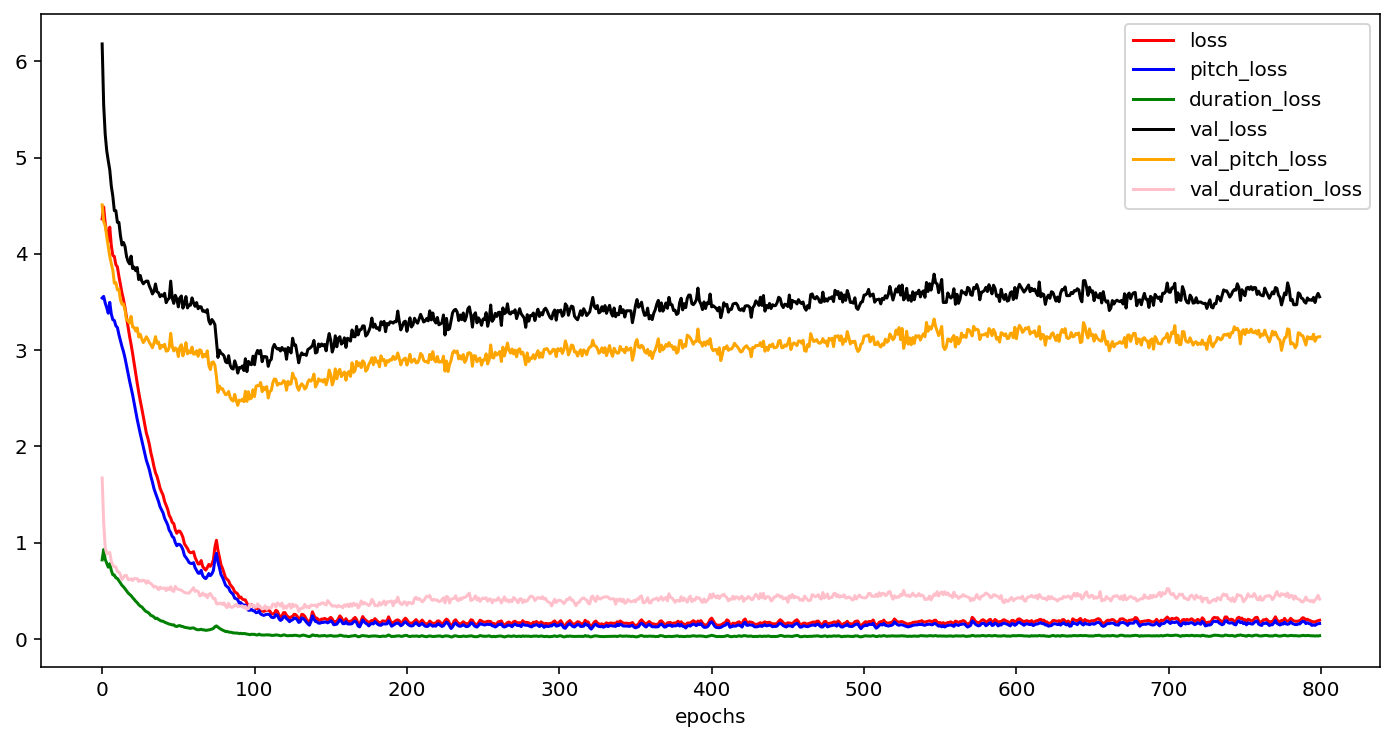

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

LSTMMusic.plot_history(
    [
        lstm_music.losses, lstm_music.n_losses, lstm_music.d_losses,
        lstm_music.val_losses, lstm_music.val_n_losses, lstm_music.val_d_losses
    ],
    [
        'loss', 'pitch_loss', 'duration_loss', 'val_loss', 'val_pitch_loss', 'val_duration_loss' 
    ]
)

# 音楽を生成する

## テスト用の音楽 val_x_train[0] の最初の32音符を与えて、続きを生成する

In [11]:
s_notes0 = val_x_notes[0][:lstm_music.seq_len]
s_durations0 = val_x_durations[0][:lstm_music.seq_len]

g_notes0, g_durations0 = lstm_music.generate(s_notes0, s_durations0, 64,0.5,0.5)

midi_stream0 = data_seq.getMidiStream(g_notes0, g_durations0)

In [12]:
print(g_notes0)

[206, 444, 100, 29, 100, 317, 100, 444, 400, 100, 100, 29, 100, 444, 100, 317, 400, 284, 284, 29, 100, 444, 317, 444, 284, 444, 444, 29, 100, 206, 182, 126, 317, 317, 29, 444, 317, 444, 317, 317, 206, 29, 29, 29, 317, 317, 29, 206, 206, 284, 29, 284, 317, 317, 317, 29, 29, 284, 317, 206, 317, 206, 284, 284]


In [13]:
midi_stream0= midi_stream0.chordify()

midi_path = os.path.join(save_path, f'output_0_{lstm_music.epochs}.mid')
midi_stream0.write('midi', fp=midi_path)

'run\\output_0_800.mid'

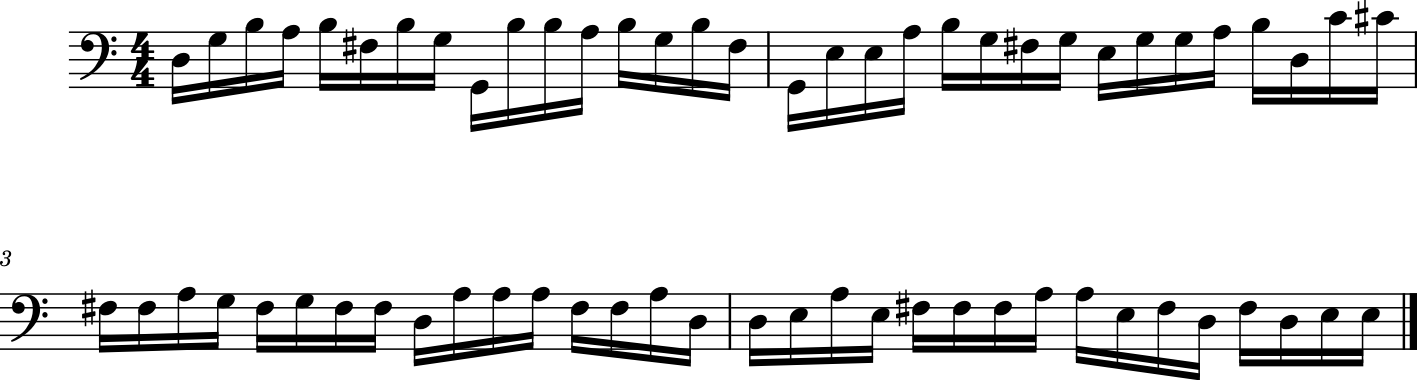

In [14]:
midi_stream0.show()

In [15]:
midi_stream0.show('midi')

## テスト用の音楽 val_x_train[1] の最初の32音符を与えて、続きを生成する

In [16]:
s_notes1 = val_x_notes[1][:lstm_music.seq_len]
s_durations1 = val_x_durations[1][:lstm_music.seq_len]

g_notes1, g_durations1 = lstm_music.generate(s_notes1, s_durations1, 64)

midi_stream1 = data_seq.getMidiStream(g_notes1, g_durations1)

In [17]:
print(g_notes1)

[444, 317, 400, 284, 100, 29, 100, 444, 317, 444, 284, 444, 317, 444, 78, 119, 119, 206, 444, 444, 29, 119, 29, 0, 29, 317, 317, 444, 29, 29, 29, 72, 72, 444, 119, 317, 29, 284, 387, 29, 444, 29, 206, 29, 444, 284, 29, 387, 284, 100, 126, 284, 206, 284, 126, 0, 444, 444, 206, 284, 126, 126, 126, 355]


In [18]:
midi_stream1 = midi_stream1.chordify()

midi_path = os.path.join(save_path, f'output_1_{lstm_music.epochs}.mid')
midi_stream1.write('midi', fp=midi_path)

'run\\output_1_800.mid'

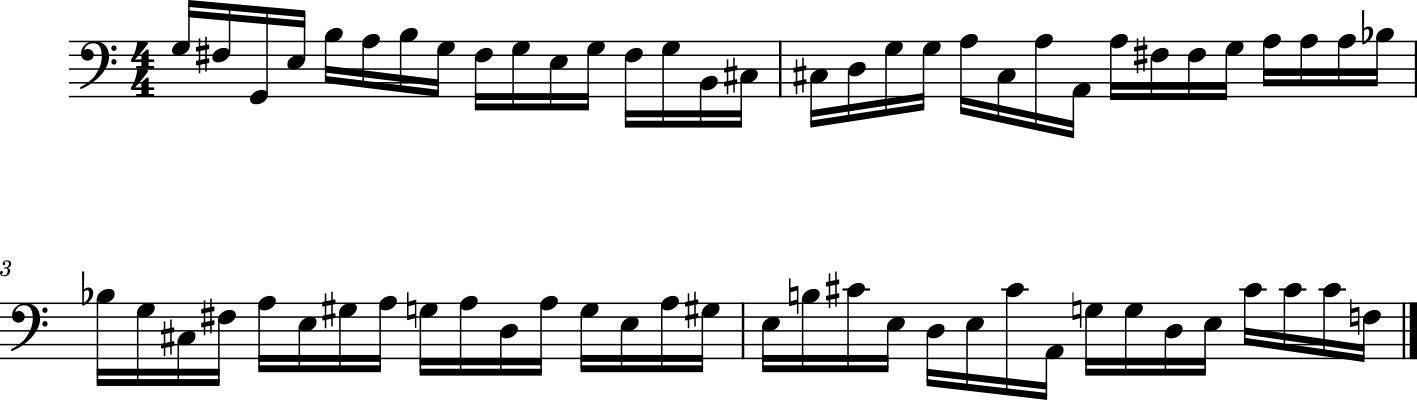

In [19]:
midi_stream1.show()

In [20]:
midi_stream1.show('midi')

## テスト用の音楽 val_x_train[2] の最初の32音符を与えて、続きを生成する

In [21]:
s_notes2 = val_x_notes[2][:lstm_music.seq_len]
s_durations2 = val_x_durations[2][:lstm_music.seq_len]

g_notes2, g_durations2 = lstm_music.generate(s_notes2, s_durations2, 64)

midi_stream2 = data_seq.getMidiStream(g_notes2, g_durations2)

In [22]:
print(g_notes2)

[317, 444, 400, 284, 317, 444, 100, 317, 206, 206, 317, 355, 29, 444, 29, 317, 444, 317, 78, 317, 100, 444, 100, 317, 182, 444, 317, 317, 100, 29, 444, 317, 161, 444, 78, 444, 100, 78, 100, 100, 182, 72, 400, 400, 29, 182, 161, 135, 161, 161, 100, 355, 100, 262, 284, 284, 440, 284, 187, 29, 444, 182, 182, 444]


In [23]:
midi_stream2 = midi_stream2.chordify()

midi_path = os.path.join(save_path, f'output_2_{lstm_music.epochs}.mid')
midi_stream2.write('midi', fp=midi_path)

'run\\output_2_800.mid'

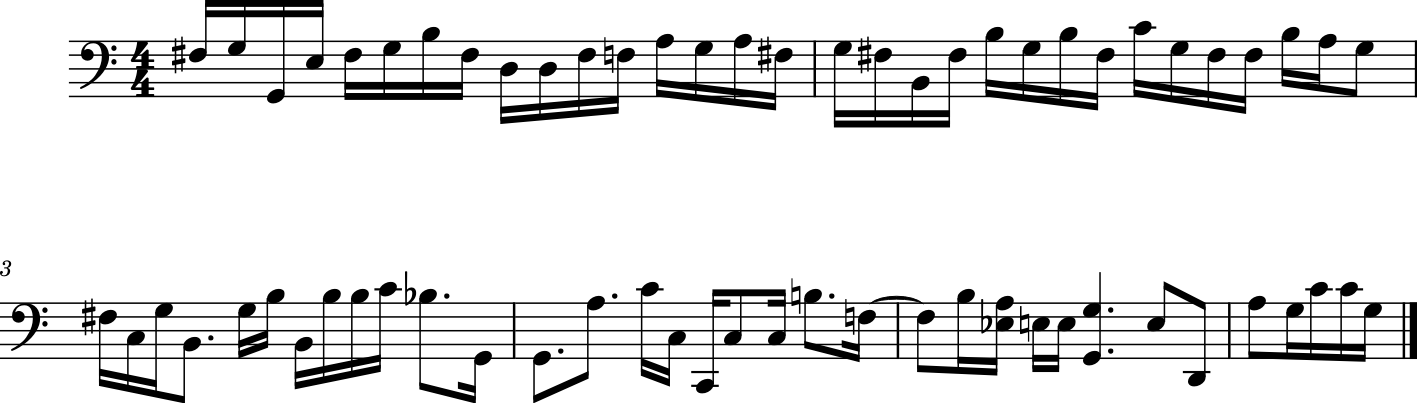

In [24]:
midi_stream2.show()

In [25]:
midi_stream2.show('midi')